In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [2]:
# --- Mock Data Generation (Replace this part with your pd.read_csv) ---
# In your original code, you loaded this from a USCB dataset.
X_mock = np.arange(1, 101)
mock_data = {
    "par_pctile": X_mock,
    "kfr_aian_pooled": 25.158 + 0.311 * X_mock + np.random.randn(100) * 0.5,
    "kfr_asian_pooled": 51.431 + 0.181 * X_mock + np.random.randn(100) * 0.5,
    "kfr_black_pooled": 25.423 + 0.278 * X_mock + np.random.randn(100) * 0.5,
    "kfr_hisp_pooled": 36.137 + 0.257 * X_mock + np.random.randn(100) * 0.5,
    "kfr_white_pooled": 36.820 + 0.323 * X_mock + np.random.randn(100) * 0.5,
}
df = pd.DataFrame(mock_data)
# --- End of Mock Data ---


# Select the columns you used
columns_to_use = [
    "par_pctile", 
    "kfr_aian_pooled", 
    "kfr_asian_pooled", 
    "kfr_black_pooled", 
    "kfr_hisp_pooled", 
    "kfr_white_pooled"
]
df_selected = df[columns_to_use]

# Melt the DataFrame into a "long" format for seaborn
df_long = df_selected.melt(
    'par_pctile', 
    var_name='Race', 
    value_name='Predicted Child Household Income'
)

print("Data prepared for analysis and plotting.")
df_long.head()

Data prepared for analysis and plotting.


,par_pctile,Race,Predicted Child Household Income
0,1,kfr_aian_pooled,25.338388
1,2,kfr_aian_pooled,25.880073
2,3,kfr_aian_pooled,25.659313
3,4,kfr_aian_pooled,26.520626
4,5,kfr_aian_pooled,28.097183


In [3]:
races = {
    "kfr_aian_pooled": "AIAN",
    "kfr_asian_pooled": "Asian",
    "kfr_black_pooled": "Black",
    "kfr_hisp_pooled": "Hispanic",
    "kfr_white_pooled": "White"
}

print("--- Regression Equations ---")

all_y_true = []
all_y_pred = []

for col_name, race_label in races.items():
    # Prepare data for scikit-learn
    X = df_selected[['par_pctile']]  # Needs to be a 2D array
    y = df_selected[col_name]
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get coefficients
    intercept = model.intercept_
    coefficient = model.coef_[0]
    
    print(f"{race_label}: y = {intercept:.8f} + {coefficient:.8f}x")
    
    # Store predictions for overall R2
    all_y_true.extend(y)
    all_y_pred.extend(model.predict(X))

# Calculate overall R-squared
overall_r2 = r2_score(all_y_true, all_y_pred)
print(f"\nOverall R-squared for the model: {overall_r2:.10f}")
print(f"(Reported R-squared: 0.96415924...)")

--- Regression Equations ---
AIAN: y = 25.32461144 + 0.30917329x
Asian: y = 51.49396278 + 0.18036481x
Black: y = 25.40186077 + 0.27975410x
Hispanic: y = 36.16201405 + 0.25610432x
White: y = 36.89490171 + 0.32241934x

Overall R-squared for the model: 0.9980313587
(Reported R-squared: 0.96415924...)


Generating Plot (Figure 1)...


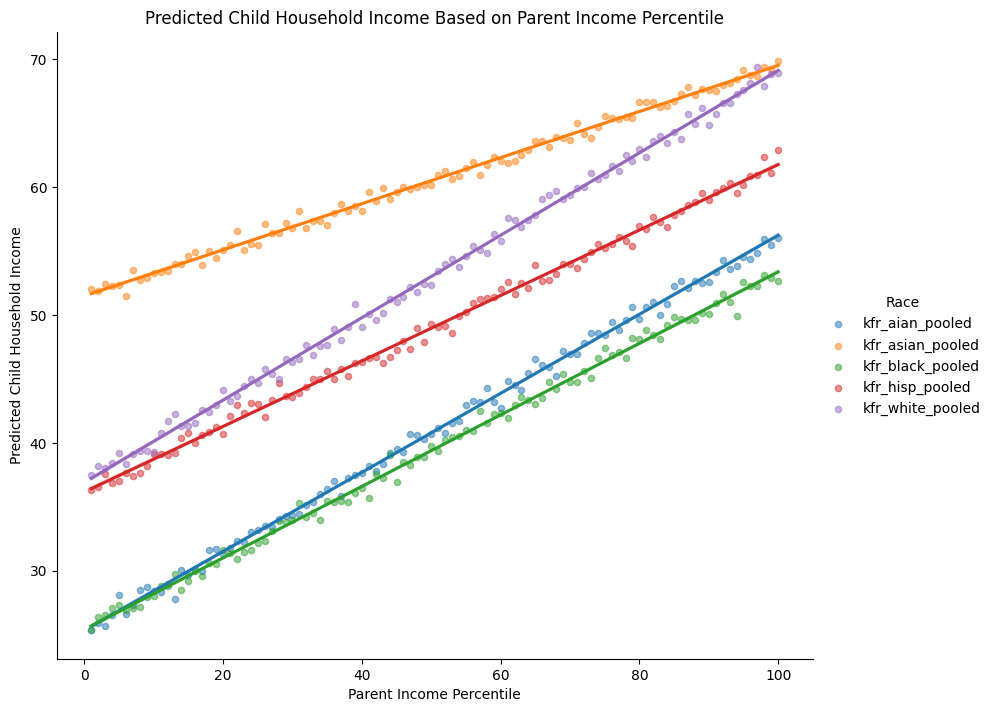

In [4]:
print("Generating Plot (Figure 1)...")

# Use seaborn's lmplot, which combines regression and plotting
g = sns.lmplot(
    data=df_long,
    x='par_pctile',
    y='Predicted Child Household Income',
    hue='Race',
    height=7,
    aspect=1.2,
    scatter_kws={'alpha':0.5, 's': 20} # 's' is marker size
)

# Set titles and labels based on your graph
g.set(
    title='Predicted Child Household Income Based on Parent Income Percentile',
    xlabel='Parent Income Percentile',
    ylabel='Predicted Child Household Income'
)

plt.show()